# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [54]:
data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [55]:
data['ID'].unique()


array(['USW00094889', 'USC00208972', 'USC00200032', 'USC00205563',
       'USC00200230', 'USW00014833', 'USC00207308', 'USC00203712',
       'USW00004848', 'USC00200220', 'USC00205822', 'USC00200842',
       'USC00205450', 'USC00201250', 'USC00207320', 'USC00200228',
       'USC00202308', 'USW00014853', 'USC00205050', 'USC00208202',
       'USC00208080', 'USC00207312', 'USC00205451', 'USC00201502'], dtype=object)

In [56]:
data.shape

(165085, 4)

In [57]:
data.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [58]:
data['Date_Mod']=pd.Series(map(pd.to_datetime, data['Date']))

In [59]:
#data[data.Date.str.contains('20..-02-29')==True]

In [60]:
#data[data['Date']=='2012-02-29']

In [61]:
data = data[data.Date.str.contains('20..-02-29')==False]

In [62]:
data['Year'] = data['Date_Mod'].map(lambda x: x.year)

In [63]:
data['Year'].nunique()

11

In [64]:
data_=data[data['Year']==2015]

In [65]:
data = data[data['Year']!=2015]

In [67]:
data_.groupby('Year')

In [66]:
data.groupby('Year')

In [68]:
data=data.set_index('Year')

In [69]:
data_=data_.set_index('Year')

In [70]:
data['day_month']=data['Date_Mod'].map(lambda x: str(x.month*100+x.day).zfill(4))

In [71]:
data_['day_month']=data_['Date_Mod'].map(lambda x: str(x.month*100+x.day).zfill(4))

In [72]:
max_df = data[data['Element']=='TMAX']
min_df = data[data['Element']=='TMIN']

In [73]:
print(max_df.shape,min_df.shape)

(76100, 6) (75145, 6)


In [74]:
print(data.shape)

(151245, 6)


In [75]:
max_df.head()

,ID,Date,Element,Data_Value,Date_Mod,day_month
Year,,,,,,
2014,USW00094889,2014-11-12,TMAX,22,2014-11-12,1112
2008,USC00200032,2008-05-26,TMAX,278,2008-05-26,0526
2005,USC00205563,2005-11-11,TMAX,139,2005-11-11,1111
2014,USC00200230,2014-02-27,TMAX,-106,2014-02-27,0227
2010,USW00014833,2010-10-01,TMAX,194,2010-10-01,1001


In [76]:
max_max_df=pd.DataFrame(max_df.groupby(['day_month'])['Data_Value'].max())

In [77]:
min_min_df=pd.DataFrame(min_df.groupby(['day_month'])['Data_Value'].min())

In [78]:
max_max_df.shape

(365, 1)

In [79]:
min_min_df.shape

(365, 1)

In [80]:
max_min_df = pd.merge(max_max_df,min_min_df,how='inner',left_index=True,right_index=True)

In [81]:
max_min_df.head()

,Data_Value_x,Data_Value_y
day_month,,
0101,156,-160
0102,139,-267
0103,133,-267
0104,106,-261
0105,128,-150


In [82]:
max_min_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0101 to 1231
Data columns (total 2 columns):
Data_Value_x    365 non-null int64
Data_Value_y    365 non-null int64
dtypes: int64(2)
memory usage: 8.6+ KB


In [83]:
max_min_df['day_mont']=max_min_df.index

In [84]:
max_min_df.reset_index(drop=True, inplace=True)

In [85]:
max_min_df['day_mont']=max_min_df['day_mont'].astype(str)

In [86]:
#map(lambda p: pd.to_datetime(p, format='%d%m'),max_min_df['day_month'])

In [87]:
max_min_df['in_year']=pd.Series(map(lambda p: pd.to_datetime(p, format='%m%d'),max_min_df['day_mont']))

In [88]:
#max_min_df['in_year']=max_min_df['in_year'].dt.strftime('%m%d')

In [89]:
max_min_df['str_date']=max_min_df['in_year'].dt.strftime('%m%d')

In [90]:
max_min_df['str_date']=max_min_df['str_date'].astype(int)

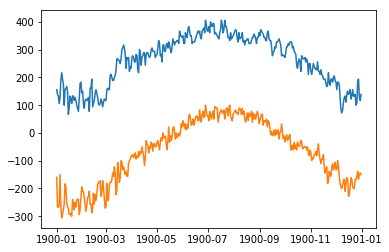

In [91]:
plt.figure()
plt.plot(max_min_df['in_year'],max_min_df['Data_Value_x'],max_min_df['in_year'],max_min_df['Data_Value_y'])
#plt.title()
plt.show()

In [92]:
d = max_min_df['in_year'].values

In [93]:
import matplotlib.dates as mdates

In [94]:
import numpy as np

In [95]:
observation_dates = np.arange('1900-01-01', '1901-01-01', dtype='datetime64[D]')

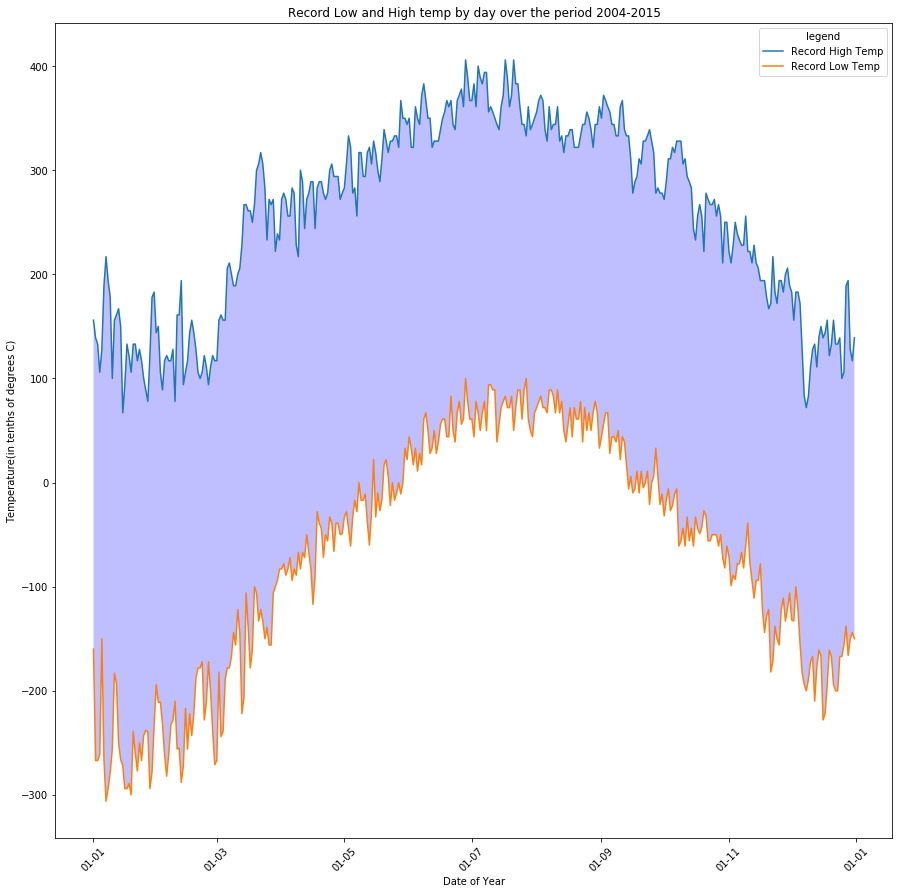

In [96]:
fig= plt.figure(figsize=(15,15))
plt.plot(observation_dates ,max_min_df['Data_Value_x'],max_min_df['in_year'],max_min_df['Data_Value_y'])
ax=plt.gca()
myFmt = mdates.DateFormatter('%d-%m')
ax.xaxis.set_major_formatter(myFmt)
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
#ax.set_xticks(range(365))
ax.set_xlabel('Date of Year')
ax.set_ylabel('Temperature(in tenths of degrees C)')
ax.set_title('Record Low and High temp by day over the period 2004-2015')
L=plt.legend(title='legend')
L.get_texts()[0].set_text('Record High Temp')
L.get_texts()[1].set_text('Record Low Temp')
plt.gca().fill_between(d, 
                       max_min_df['Data_Value_x'], max_min_df['Data_Value_y'], 
                       facecolor='blue', 
                       alpha=0.25)
plt.show()

In [97]:
data['Year'] = data['Date_Mod'].map(lambda x: x.year)

In [98]:
data_['Year'] = data_['Date_Mod'].map(lambda x: x.year)

In [99]:
data_2015=data_.copy()

In [100]:
data_2015_max=data_2015[data_2015['Element']=='TMAX']
data_2015_min=data_2015[data_2015['Element']=='TMIN']

In [101]:
print(data_2015_max.shape,data_2015_min.shape)

(6920, 7) (6837, 7)


In [102]:
data_2015_max.head()

,ID,Date,Element,Data_Value,Date_Mod,day_month,Year
Year,,,,,,,
2015,USC00203712,2015-03-17,TMAX,189,2015-03-17,0317,2015
2015,USC00205563,2015-01-03,TMAX,22,2015-01-03,0103,2015
2015,USC00202308,2015-08-30,TMAX,261,2015-08-30,0830,2015
2015,USC00200032,2015-06-06,TMAX,233,2015-06-06,0606,2015
2015,USC00208972,2015-04-09,TMAX,67,2015-04-09,0409,2015


In [103]:
data_2015_max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6920 entries, 2015 to 2015
Data columns (total 7 columns):
ID            6920 non-null object
Date          6920 non-null object
Element       6920 non-null object
Data_Value    6920 non-null int64
Date_Mod      6920 non-null datetime64[ns]
day_month     6920 non-null object
Year          6920 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 432.5+ KB


In [104]:
max_2015_df=pd.DataFrame(data_2015_max.groupby(['day_month'])['Data_Value'].max())
min_2015_df=pd.DataFrame(data_2015_min.groupby(['day_month'])['Data_Value'].min())

In [105]:
max_2015_df.columns

Index(['Data_Value'], dtype='object')

In [106]:
max_2015_df.head()

,Data_Value
day_month,
0101,11
0102,39
0103,39
0104,44
0105,28


In [107]:
max_min_df.shape

(365, 5)

In [108]:
max_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
Data_Value_x    365 non-null int64
Data_Value_y    365 non-null int64
day_mont        365 non-null object
in_year         365 non-null datetime64[ns]
str_date        365 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 14.3+ KB


In [109]:
max_2015_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0101 to 1231
Data columns (total 1 columns):
Data_Value    365 non-null int64
dtypes: int64(1)
memory usage: 5.7+ KB


In [110]:
max_min_df.head()

,Data_Value_x,Data_Value_y,day_mont,in_year,str_date
0,156,-160,0101,1900-01-01,101
1,139,-267,0102,1900-01-02,102
2,133,-267,0103,1900-01-03,103
3,106,-261,0104,1900-01-04,104
4,128,-150,0105,1900-01-05,105


In [111]:
max_2015_df['day_month']=max_2015_df.index
max_2015_df.reset_index(drop=True,inplace=True)
min_2015_df['day_month']=min_2015_df.index
min_2015_df.reset_index(drop=True,inplace=True)

In [112]:
min_2015_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
Data_Value    365 non-null int64
day_month     365 non-null object
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [113]:
max_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
Data_Value_x    365 non-null int64
Data_Value_y    365 non-null int64
day_mont        365 non-null object
in_year         365 non-null datetime64[ns]
str_date        365 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 14.3+ KB


In [114]:
#max_2015_df['day_month']=max_2015_df['day_month'].astype(str)

In [115]:
max_2015_df.columns=['temp_max','day_month']
min_2015_df.columns=['temp_min','day_month']

In [689]:
#comp_df=pd.merge(max_min_df, max_2015_df, how='inner',left_on='day_mont',right_on='day_month')

In [690]:
#comp_df=pd.merge(comp_df, min_2015_df, how='inner',left_on='day_mont',right_on='day_month')

In [691]:
#comp_df=comp_df[['Data_Value_x','Data_Value_y','day_mont','in_year','temp_max','temp_min']]

In [116]:
#comp_df.head()

NameError: name 'comp_df' is not defined

In [693]:
#final_df=comp_df[(comp_df['temp_max']>comp_df['Data_Value_x']) | (comp_df['temp_min']<comp_df['Data_Value_y']) ]

In [694]:
#data = data[data['Year']!=2015]

In [117]:
max_df_alt = data[data['Element']=='TMAX']
min_df_alt = data[data['Element']=='TMIN']

In [118]:
print(max_df_alt.shape,min_df_alt.shape)

(76100, 7) (75145, 7)


In [119]:
max_max_df_alt=pd.DataFrame(max_df_alt.groupby(['day_month'])['Data_Value'].max())

In [120]:
min_min_df_alt=pd.DataFrame(min_df_alt.groupby(['day_month'])['Data_Value'].min())

In [121]:
max_min_df_alt = pd.merge(max_max_df_alt,min_min_df_alt,how='inner',left_index=True,right_index=True)

In [122]:
max_min_df_alt['day_mont']=max_min_df_alt.index

In [123]:
max_min_df_alt.reset_index(drop=True, inplace=True)

In [124]:
max_min_df_alt['day_mont']=max_min_df_alt['day_mont'].astype(str)

In [125]:
max_min_df_alt['in_year']=pd.Series(map(lambda p: pd.to_datetime(p, format='%m%d'),max_min_df_alt['day_mont']))

In [126]:
max_min_df_alt['str_date']=max_min_df_alt['in_year'].dt.strftime('%m%d')

In [127]:
max_min_df_alt['str_date']=max_min_df_alt['str_date'].astype(int)

In [128]:
max_min_df_alt=max_min_df_alt[['Data_Value_x','Data_Value_y','day_mont','in_year']]

In [129]:
max_min_df_alt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
Data_Value_x    365 non-null int64
Data_Value_y    365 non-null int64
day_mont        365 non-null object
in_year         365 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.5+ KB


In [130]:
max_min_df_alt.head()

,Data_Value_x,Data_Value_y,day_mont,in_year
0,156,-160,0101,1900-01-01
1,139,-267,0102,1900-01-02
2,133,-267,0103,1900-01-03
3,106,-261,0104,1900-01-04
4,128,-150,0105,1900-01-05


In [131]:
comp_df=pd.merge(max_min_df_alt, max_2015_df, how='inner',left_on='day_mont',right_on='day_month')

In [132]:
comp_df=pd.merge(comp_df, min_2015_df, how='inner',left_on='day_mont',right_on='day_month')

In [133]:
comp_df=comp_df[['Data_Value_x','Data_Value_y','day_mont','in_year','temp_max','temp_min']]

In [134]:
final_df=comp_df[(comp_df['temp_max']>comp_df['Data_Value_x']) | (comp_df['temp_min']<comp_df['Data_Value_y']) ]

In [146]:
final_df_1=comp_df[(comp_df['temp_max']>comp_df['Data_Value_x'])]

In [147]:
final_df_2=comp_df[(comp_df['temp_min']<comp_df['Data_Value_y'])]

In [159]:
final_df_2.drop('temp_max',axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [154]:
final_df_1.drop('temp_min',axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [156]:
final_df_1.columns=['Data_Value_x', 'Data_Value_y', 'day_mont', 'in_year', 'temp']

In [161]:
final_df_2.head()

,Data_Value_x,Data_Value_y,day_mont,in_year,temp
4,128,-150,0105,1900-01-05,-155
10,156,-183,0111,1900-01-11,-200
33,89,-232,0203,1900-02-03,-238
44,106,-217,0214,1900-02-14,-239
45,117,-256,0215,1900-02-15,-260


In [160]:
final_df_2.columns=['Data_Value_x', 'Data_Value_y', 'day_mont', 'in_year', 'temp']

In [169]:
len(final_df_2)

31

In [135]:
final_df.head()

,Data_Value_x,Data_Value_y,day_mont,in_year,temp_max,temp_min
4,128,-150,0105,1900-01-05,28,-155
10,156,-183,0111,1900-01-11,6,-200
33,89,-232,0203,1900-02-03,-21,-238
39,78,-210,0209,1900-02-09,83,-116
44,106,-217,0214,1900-02-14,-27,-239


In [167]:
final_df_2.drop([292],inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [139]:
e = final_df['in_year'].values

In [170]:
bigdata = final_df_1.append(final_df_2)

In [173]:
bigdata = bigdata.sort_values('in_year', ascending=True)

In [174]:
bigdata.head()

,Data_Value_x,Data_Value_y,day_mont,in_year,temp
4,128,-150,0105,1900-01-05,-155
10,156,-183,0111,1900-01-11,-200
33,89,-232,0203,1900-02-03,-238
39,78,-210,0209,1900-02-09,83
44,106,-217,0214,1900-02-14,-239


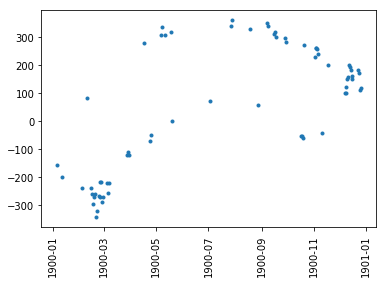

In [176]:
plt.plot(bigdata['in_year'], bigdata['temp'], '.')
plt.xticks(rotation='vertical')
plt.show()

In [177]:
#fig= plt.figure(figsize=(15,15))
#plt.scatter(final_df['Data_Value_x'],final_df['Data_Value_y'])
#plt.show()

In [191]:
#leg = plt.legend(loc=(1.03,0), title="Year")
#ax.add_artist(leg)

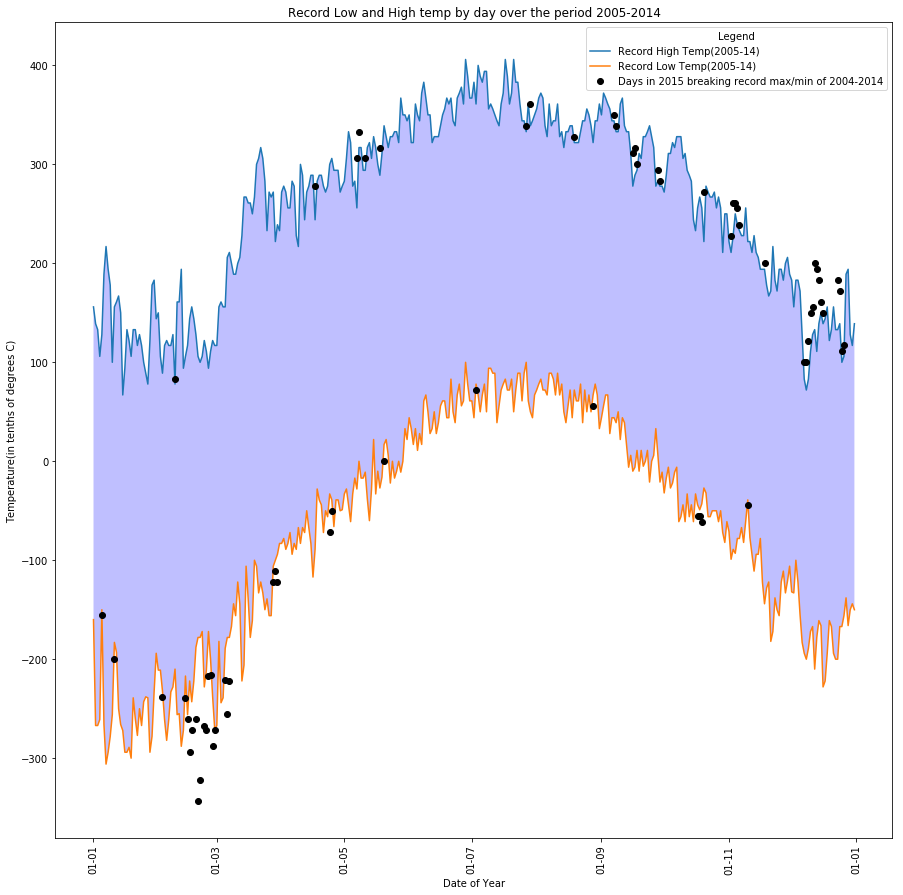

In [206]:
fig= plt.figure(figsize=(15,15))
plt.plot(observation_dates ,max_min_df['Data_Value_x'],max_min_df['in_year'],max_min_df['Data_Value_y'])
ax=plt.gca()
myFmt = mdates.DateFormatter('%d-%m')
ax.xaxis.set_major_formatter(myFmt)
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
#ax.set_xticks(range(365))
ax.set_xlabel('Date of Year')
ax.set_ylabel('Temperature(in tenths of degrees C)')
ax.set_title('Record Low and High temp by day over the period 2005-2014')
plt.gca().fill_between(d, 
                       max_min_df['Data_Value_x'], max_min_df['Data_Value_y'], 
                       facecolor='blue', 
                       alpha=0.25)
plt.plot(bigdata['in_year'], bigdata['temp'], 'o',c='black')
plt.xticks(rotation='vertical')
#plt.legend(loc=4, frameon=False, title='Legend')
plt.legend(title= 'Legend', labels=['Record High Temp(2005-14)','Record Low Temp(2005-14)','Days in 2015 breaking record max/min of 2004-2014'])
plt.show()